In [1]:
import numpy as np 
from scipy.io import loadmat 
import matplotlib.pyplot as plt
from scipy import optimize 

In [2]:
data = loadmat('ex5data1.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
X = data['X']
y = data['y']
X_val = data['Xval']
y_val = data['yval']
X_test = data['Xtest']
y_test = data['ytest']

In [5]:
print(X.shape)
print(y.shape)
print(X_val.shape)
print(y_val.shape)

(12, 1)
(12, 1)
(21, 1)
(21, 1)


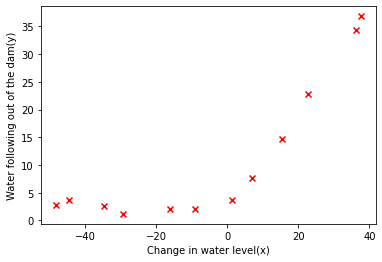

In [6]:
#Visualize data set
plt.scatter(X,y,marker ="x", c ="r")
plt.ylabel("Water following out of the dam(y)")
plt.xlabel("Change in water level(x)")
plt.show()

In [7]:
# Regularized linear regression cost function 
def linearRegcostfunction(theta, X, y,lamda):
    theta = theta.reshape(2,1)
    m = len(y)
    J = 0
    X = np.hstack((np.ones((m, 1)), X))
    h = X.dot(theta)
    J = (1/(2*m))*np.sum((h - y)**2) + (lamda/ (2*m))*np.sum((theta[1:])**2) 
    grad = (1/m)*((h-y).T.dot(X))
    grad[:,1] = grad[:,1]+(lamda/m)*theta[1:]
    return J, grad.ravel()

In [8]:
theta = np.ones((2))
J_, grad_= linearRegcostfunction(theta, X, y, 1)

In [9]:
print("J: ", J_) 
print("grad:", grad_)
print(X.shape)

J:  303.9931922202643
grad: [-15.30301567 598.25074417]
(12, 1)


In [10]:
# #fitting linear regression 
def trainLinearReg(X, y, lamda):
    init_theta = np.zeros((2))
    theta = optimize.minimize( fun = linearRegcostfunction, x0 = init_theta ,args = (X, y, lamda),method = 'CG', jac = True, options = {'maxiter' : 200} )
    return theta

In [70]:
trained = trainLinearReg(X, y, 1)
print(trained.x.shape)

(2,)


In [71]:
theta_trained = trained.x.reshape(2,1)

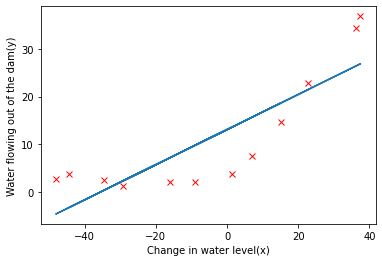

In [72]:
X_au = np.hstack((np.ones((len(y),1)), X))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.plot(X,y, 'rx')
plt.plot(X, X_au.dot(theta_trained))
plt.show()

In [151]:
#Learning curve
def learning_curve(X,y,Xval, yval, lamda):
    m_train = X.shape[0]
    m_valid = Xval.shape[0]
    error_train = np.zeros(m_train)
    error_valid = np.zeros(m_train)
    Xval = np.hstack((np.ones((m_valid,1)),Xval))
#     yval = np.hstack((np.ones((m_valid,1)),yval))
    for i in range(m_train):
        data_set = X[0:i+1,:] #(i+1, 2)
        labels = y[0:i+1,:] #(i+1, 1)
        t = trainLinearReg(data_set, labels, 1)
        theta_trained = t.x.reshape(2,1)
        h_train = np.hstack((np.ones((i+1,1)),data_set)).dot(theta_trained)
        h_valid = Xval.dot(theta_trained)
        error_train[i] = (1/(2*(i+1)))*np.sum((h_train - labels)**2)
        error_valid[i] = (1/(2*(m_valid)))*np.sum((h_valid - yval)**2)
    return error_train, error_valid 

In [152]:
error_train_, error_valid_ = learning_curve(X,y,X_val, y_val,1)

Text(0.5, 0, 'Number of trainning examples')

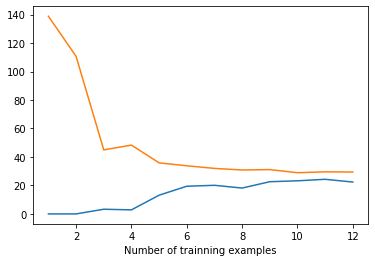

In [156]:
#plot data
num_data = np.arange(1, error_train_.size +1)
plt.plot(num_data, error_train_)
plt.plot(num_data, error_valid_)
plt.xlabel("Number of trainning examples")

In [155]:
#poly feature